In [43]:
import os
import torch
import pandas as pd
import numpy as np
import csv
import networkx as nx
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from collections import OrderedDict 

## Drawing Utility

Takes in a undirected graph, and a color map, and draw the graph out in a circular format. 

In [37]:
def draw_entry(entry):
    g = entry["graph"]
    label = entry["label"]
    
    # Create color map from selected nodes, green for selected, grey for unselected.
    color_map = ["grey"] * len(g.nodes)

    for i in np.flatnonzero(label):
        color_map[i] = "green"
        
    node_lables = nx.get_node_attributes(g, "weight")
    
    if node_lables:
        node_lables = {k: "{0}: {1}".format(k, v) for (k, v) in node_lables.items()}
    else:
        node_lables = {k: k for k in g.nodes}
    
    plt.figure()
    pos = nx.circular_layout(g)
    nx.draw(g, pos, node_size=2000, width = 1, node_color = color_map)
    nx.draw_networkx_labels(g, pos, node_lables)
    plt.show()  
    # plt.savefig("graph.png", dpi=1000)


In [39]:
dataset_name = "generic_binomial"
root_dir = "data/" + dataset_name
label_filename = "label.csv"

# Read CSV File
label_arr = []
with open(os.path.join(root_dir, label_filename), 'r') as label_file:
    label_reader = csv.reader(label_file, delimiter = ",")
    for row in label_reader:
        label_arr.append([row[0]] + sorted(row[1:]))
label_frame = pd.DataFrame(data=label_arr)
label_frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,binomial0.txt,10,16,20,22,25,31,36,44,49,None,None
1,binomial1.txt,14,15,19,2,22,26,28,38,40,None,None
2,binomial2.txt,15,2,24,25,26,3,38,40,None,None,None
3,binomial3.txt,10,15,22,29,33,35,36,45,7,None,None
4,binomial4.txt,0,1,10,12,17,19,21,35,48,9,None


In [53]:
class MaxIndSetDataset(Dataset):
    """Graphs labelled with its Maximum Independent Set"""
    
    def __init__(self, csv_file = None, root_dir = None, tar_dir = None):
        if csv_file and root_dir:
            # Read CSV File
            label_arr = []
            with open(os.path.join(root_dir, label_filename), 'r') as label_file:
                label_reader = csv.reader(label_file, delimiter = ",")
                for row in label_reader:
                    label_arr.append([row[0]] + sorted(row[1:]))
            self.label_frame = pd.DataFrame(data=label_arr)
            self.root_dir = root_dir
        else:
            raise NotImplementedError("Need to supply csv_file and root_dir")
    def __len__(self):
        return len(self.label_frame)
    
    def __getitem__(self, idx):
        graph_name = os.path.join(self.root_dir, self.label_frame.iloc[idx, 0])
        graph = nx.read_adjlist(graph_name)
        label_array = np.array(self.label_frame.iloc[idx, 1:].dropna(), dtype=np.int)
        
        # print(label_array)
        # A binary vector of the nodes used        print(i)
        label_bin = np.zeros(len(graph.nodes))
        label_bin[label_array] = 1
        
        sample = {"graph": graph, "label": label_bin}
        return sample

In [54]:
generic_bin_dataset = MaxIndSetDataset(csv_file='data/weighted_binomial_20/label.csv', 
                                       root_dir='data/weighted_binomial_20/')


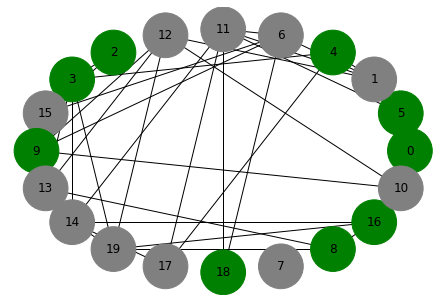

In [59]:
draw_entry(generic_bin_dataset[9])